In [182]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [184]:
import pandas as pd

# 불러오기
base_df = pd.read_parquet("../data/train/3.승인매출정보/201812_train_승인매출정보.parquet")

print(base_df.head())

     기준년월            ID  최종이용일자_기본  최종이용일자_신판  최종이용일자_CA  최종이용일자_카드론  \
0  201812  TRAIN_000000   20181224   20181224   20181221       10101   
1  201812  TRAIN_000001   20181214   20181214   20170728    20170327   
2  201812  TRAIN_000002   20181228   20181228   20181216    20151119   
3  201812  TRAIN_000003   20181221   20181212   20181221       10101   
4  201812  TRAIN_000004   20180905   20180905      10101       10101   

   최종이용일자_체크  최종이용일자_일시불  최종이용일자_할부  이용건수_신용_B0M  ...  승인거절건수_한도초과_B0M  \
0   20180203    20181224   20180713            7  ...                0   
1      10101    20181214   20171231            9  ...                0   
2   20141230    20181228   20181115           20  ...                0   
3   20141111    20181203   20181212           12  ...                0   
4   20181210    20180905      10101            0  ...                0   

   승인거절건수_BL_B0M  승인거절건수_입력오류_B0M  승인거절건수_기타_B0M  승인거절건수_R3M  승인거절건수_한도초과_R3M  \
0              0                0        

In [186]:
# 1. Segment 정보 불러오기
member_df = pd.read_parquet("../data/train/1.회원정보/201812_train_회원정보.parquet", columns=["ID", "Segment"])

# 2. 병합
df = pd.merge(base_df, member_df, on="ID", how="left")

# 3. 결과
df

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,이용금액대,Segment
0,201812,TRAIN_000000,20181224,20181224,20181221,10101,20180203,20181224,20180713,7,...,0,0,0,0,0,0,0,0,01.100만원+,D
1,201812,TRAIN_000001,20181214,20181214,20170728,20170327,10101,20181214,20171231,9,...,0,0,0,0,0,0,0,0,03.30만원+,E
2,201812,TRAIN_000002,20181228,20181228,20181216,20151119,20141230,20181228,20181115,20,...,0,0,0,0,0,0,0,0,01.100만원+,C
3,201812,TRAIN_000003,20181221,20181212,20181221,10101,20141111,20181203,20181212,12,...,0,0,0,0,0,0,0,0,01.100만원+,D
4,201812,TRAIN_000004,20180905,20180905,10101,10101,20181210,20180905,10101,0,...,0,0,0,0,0,0,0,0,05.10만원-,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,20181220,20181220,10101,10101,20181212,20181220,20160501,2,...,0,0,0,0,0,0,0,0,09.미사용,E
399996,201812,TRAIN_399996,20181202,20181202,10101,20170112,10101,20181202,20180112,10,...,0,0,0,0,0,0,0,0,01.100만원+,D
399997,201812,TRAIN_399997,20181230,20181230,10101,10101,20131124,20181230,20180919,10,...,0,0,0,0,0,0,0,0,02.50만원+,C
399998,201812,TRAIN_399998,20161224,20161224,10101,10101,10101,20161224,20150122,-2,...,0,0,0,0,0,0,0,0,09.미사용,E


In [188]:
# Recency
recency_cols = [
    '이용후경과월_신용',
    '이용후경과월_체크',
    '이용후경과월_카드론',
]

# Frequency (최근 6개월간 이용건수)
frequency_cols = [
    '이용건수_신용_R6M',
    '이용건수_체크_R6M',
]

# Monetary (최근 6개월간 총 이용금액)
monetary_cols = [
    '이용금액_일시불_R6M',
    '이용금액_할부_R6M',
    '이용금액_CA_R6M',
    '이용금액_체크_R6M',
    '이용금액_카드론_R6M',
]

# 최종 컬럼 목록
rfm_cols = ['ID'] + recency_cols + frequency_cols + monetary_cols

In [190]:
# 가장 최근 사용한 카드 유형의 경과월만 사용 (예: 3개 중 최소값)
df['Recency'] = df[recency_cols].min(axis=1)

df['Frequency'] = df[frequency_cols].sum(axis=1)
df['Monetary'] = df[monetary_cols].sum(axis=1)

In [192]:
print(df[['ID', 'Recency', 'Frequency', 'Monetary']].head())

             ID  Recency  Frequency  Monetary
0  TRAIN_000000        0         46     81163
1  TRAIN_000001        0         67     16556
2  TRAIN_000002        0        106    136345
3  TRAIN_000003        0         54     99929
4  TRAIN_000004        0         52     18535


## 고객 4분위로 나누기
- R: 55% / 70% / 85% / 100%
    - 0: 55.5%
    - 0~1: 69.9%
    - 0~8: 86%
    - 0~12: 100%
- F/M: 음수 0으로 바꾼 뒤, 25% / 50% / 75% / 100%
    - pd.qcut: 누적분포 기준 분위수 자동 나눠줌

In [195]:
df['Recency'].value_counts(normalize=True).sort_index()

Recency
0     0.555018
1     0.144732
2     0.060073
3     0.026828
4     0.016762
5     0.012305
6     0.012077
7     0.015232
8     0.017767
9     0.011535
10    0.006540
11    0.005372
12    0.115757
Name: proportion, dtype: float64

In [197]:
# 1. Recency: 낮을수록 점수 높게

def score_recency(r):
    if r == 0:
        return 4
    elif r == 1:
        return 3
    elif r in [2, 3, 4, 5, 6, 7, 8]:
        return 2
    else:
        return 1

df['R_score'] = df['Recency'].apply(score_recency)

# 2. Frequency: 높을수록 점수 높게

df['Frequency'] = df['Frequency'].apply(lambda x: max(x, 0))
df['F_score'] = pd.qcut(df['Frequency'], 4, labels=[1,2,3,4])

# 3. Monetary: 높을수록 점수 높게

df['Monetary'] = df['Monetary'].apply(lambda x: max(x, 0))
df['M_score'] = pd.qcut(df['Monetary'], 4, labels=[1,2,3,4])

In [198]:
print(df['R_score'].value_counts().sort_index())
print(df['F_score'].value_counts().sort_index())
print(df['M_score'].value_counts().sort_index())

R_score
1     55682
2     64418
3     57893
4    222007
Name: count, dtype: int64
F_score
1    100296
2    100093
3    100182
4     99429
Name: count, dtype: int64
M_score
1    100002
2    100000
3     99998
4    100000
Name: count, dtype: int64


## RFM 클러스터링

In [203]:
from sklearn.preprocessing import StandardScaler

rfm_for_cluster = df[['R_score', 'F_score', 'M_score']]  # 또는 RFM 원값
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_cluster)

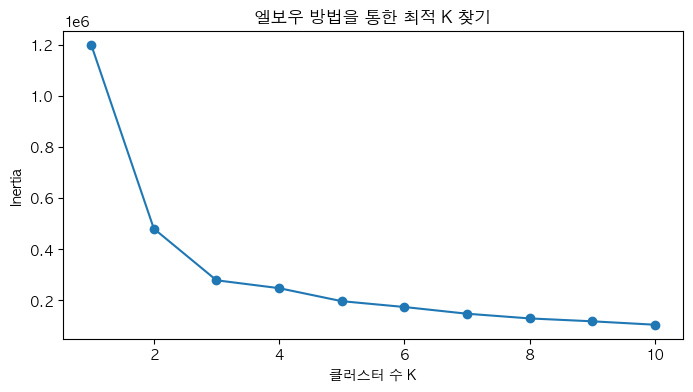

In [205]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('클러스터 수 K')
plt.ylabel('Inertia')
plt.title('엘보우 방법을 통한 최적 K 찾기')
plt.show()

In [207]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['KMeans_cluster'] = kmeans.fit_predict(rfm_scaled)

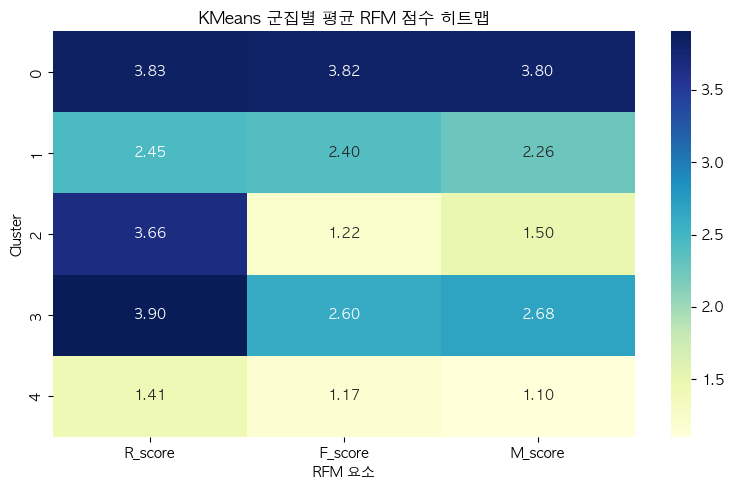

In [209]:
# 숫자형으로 변환
df['R_score'] = df['R_score'].astype(int)
df['F_score'] = df['F_score'].astype(int)
df['M_score'] = df['M_score'].astype(int)

# 이후 군집별 평균 계산
cluster_summary = df.groupby('KMeans_cluster')[['R_score', 'F_score', 'M_score']].mean()

# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("KMeans 군집별 평균 RFM 점수 히트맵")
plt.ylabel("Cluster")
plt.xlabel("RFM 요소")
plt.tight_layout()
plt.show()

In [236]:
# 클러스터 번호를 고객 유형으로 매핑
cluster_mapping = {
    0: 'VIP 고객',
    1: '빈번 저가 고객',
    2: '신규 고객',
    3: '충성 고객',
    4: '이탈 고객'
}

# 데이터프레임에 '고객유형' 컬럼 추가 (df는 클러스터 결과 포함된 DataFrame)
df['고객유형'] = df['KMeans_cluster'].map(cluster_mapping)

# 결과 확인
df[['KMeans_cluster', '고객유형']].drop_duplicates().sort_values('KMeans_cluster')

,KMeans_cluster,고객유형
2,0,VIP 고객
7,1,빈번 저가 고객
19,2,신규 고객
0,3,충성 고객
5,4,이탈 고객


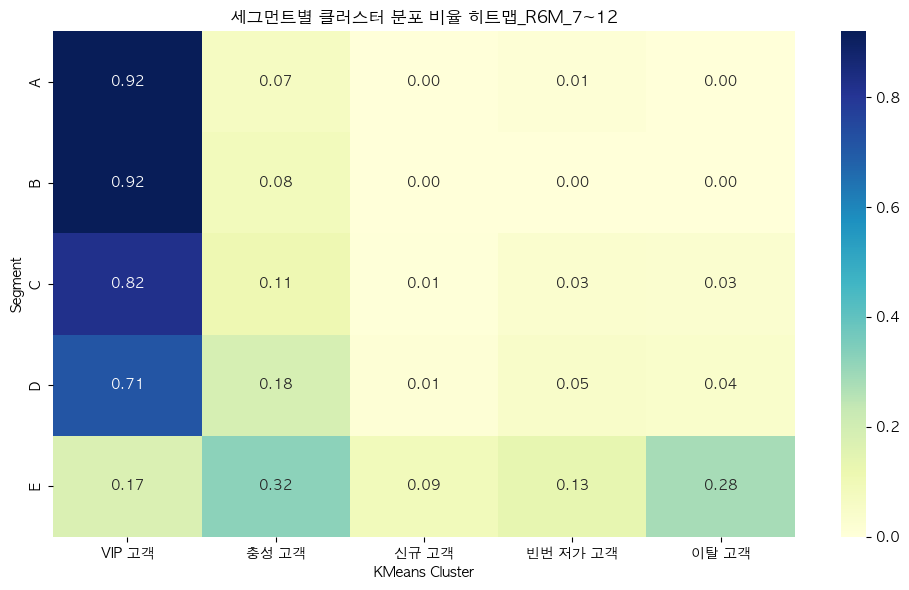

In [260]:
customer_order = ['VIP 고객', '충성 고객', '신규 고객', '빈번 저가 고객', '이탈 고객']

# 1. 교차표: 세그먼트별 클러스터 개수
seg_cluster_ct = pd.crosstab(df['Segment'], df['고객유형'])
seg_cluster_ct = seg_cluster_ct[customer_order]


# 2. 세그먼트 기준 정규화 (row-wise 비율)
seg_cluster_ratio = seg_cluster_ct.div(seg_cluster_ct.sum(axis=1), axis=0)

# 3. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(seg_cluster_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("세그먼트별 클러스터 분포 비율 히트맵_R6M_7~12")
plt.xlabel("KMeans Cluster")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

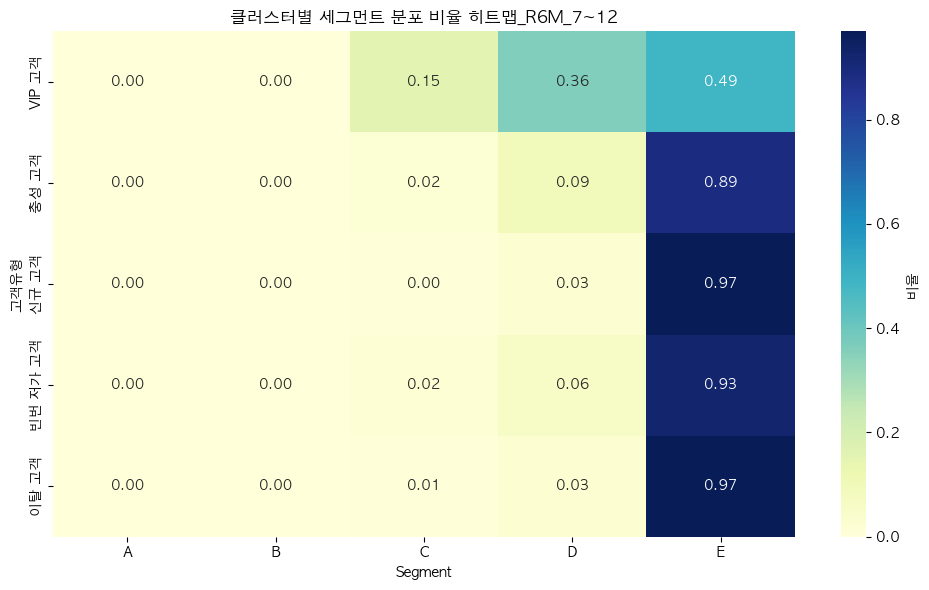

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 교차표: 고객유형별 세그먼트 개수
cluster_segment_ct = pd.crosstab(df['고객유형'], df['Segment'])

# 2. 클러스터 기준 정규화 (row-wise 비율)
cluster_segment_ratio = cluster_segment_ct.div(cluster_segment_ct.sum(axis=1), axis=0)

# 3. y축 순서 지정
customer_order = ['VIP 고객', '충성 고객', '신규 고객', '빈번 저가 고객', '이탈 고객']
cluster_segment_ratio = cluster_segment_ratio.loc[customer_order]

# 4. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_segment_ratio, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': '비율'})
plt.title("클러스터별 세그먼트 분포 비율 히트맵_R6M_7~12")
plt.xlabel("Segment")
plt.ylabel("고객유형")  # y축 라벨도 알맞게 수정
plt.tight_layout()
plt.show()

In [242]:
import pandas as pd

# 1. 교차표: 각 클러스터별 세그먼트 개수
cluster_segment_ct = pd.crosstab(df['고객유형'], df['Segment'])

# 2. 클러스터 기준 정규화 (column-wise 비율)
cluster_segment_ratio = cluster_segment_ct.div(cluster_segment_ct.sum(axis=1), axis=0)

# 3. 텍스트로 결과 출력 (전체 개수와 비율)
for cluster in cluster_segment_ct.index:
    print(f"Cluster {cluster}:")
    for segment in cluster_segment_ct.columns:
        total_count = cluster_segment_ct.loc[cluster, segment]
        ratio = cluster_segment_ratio.loc[cluster, segment]
        print(f"  Segment {segment}: Total Count = {total_count}, Ratio = {ratio:.2f}")
    print("\n")

Cluster VIP 고객:
  Segment A: Total Count = 149, Ratio = 0.00
  Segment B: Total Count = 22, Ratio = 0.00
  Segment C: Total Count = 17482, Ratio = 0.15
  Segment D: Total Count = 41565, Ratio = 0.36
  Segment E: Total Count = 55783, Ratio = 0.49


Cluster 빈번 저가 고객:
  Segment A: Total Count = 2, Ratio = 0.00
  Segment B: Total Count = 0, Ratio = 0.00
  Segment C: Total Count = 702, Ratio = 0.02
  Segment D: Total Count = 2734, Ratio = 0.06
  Segment E: Total Count = 42639, Ratio = 0.93


Cluster 신규 고객:
  Segment A: Total Count = 0, Ratio = 0.00
  Segment B: Total Count = 0, Ratio = 0.00
  Segment C: Total Count = 128, Ratio = 0.00
  Segment D: Total Count = 756, Ratio = 0.03
  Segment E: Total Count = 28038, Ratio = 0.97


Cluster 이탈 고객:
  Segment A: Total Count = 0, Ratio = 0.00
  Segment B: Total Count = 0, Ratio = 0.00
  Segment C: Total Count = 617, Ratio = 0.01
  Segment D: Total Count = 2386, Ratio = 0.03
  Segment E: Total Count = 90291, Ratio = 0.97


Cluster 충성 고객:
  Segment A:

## 가중치 클러스터링


In [218]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 가중치 설정
weights = {'R_score': 0.1, 'F_score': 0.2, 'M_score': 0.7}

# RFM 스코어 추출
rfm_scores = df[['R_score', 'F_score', 'M_score']].copy()

# 표준화
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scores)

# 가중치 적용
weighted_rfm = rfm_scaled * [weights['R_score'], weights['F_score'], weights['M_score']]

# KMeans 클러스터링 (예: 5개 클러스터)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(weighted_rfm)

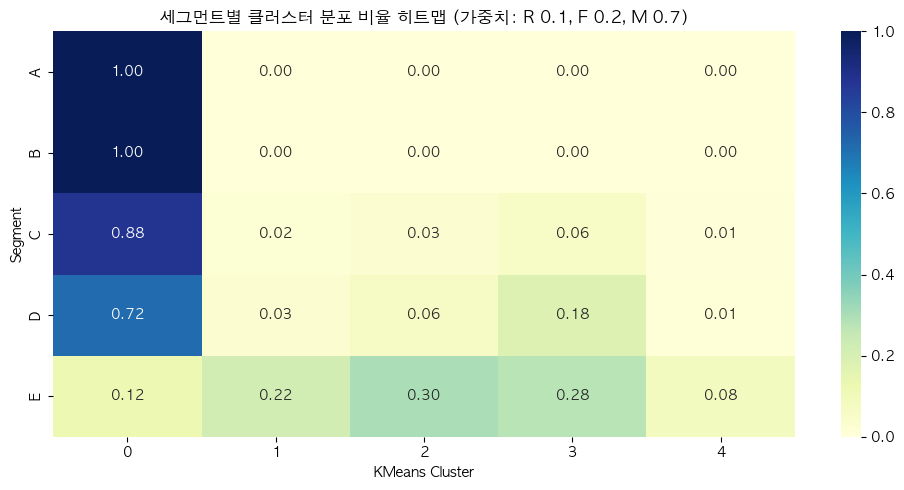

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# 교차표: 세그먼트별 클러스터 비율
ct_ratio = pd.crosstab(df['Segment'], df['cluster'], normalize='index')

# 히트맵 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(ct_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("세그먼트별 클러스터 분포 비율 히트맵 (가중치: R 0.1, F 0.2, M 0.7)")
plt.xlabel("KMeans Cluster")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

## cluster = 0인 VIP 고객들만 가져와서 보기

In [224]:
cluster_0_df = df[df['cluster'] == 0].copy()
cluster_0_df['Segment'].value_counts(normalize=True)

Segment
D    0.41724
E    0.39383
C    0.18707
A    0.00162
B    0.00024
Name: proportion, dtype: float64

In [226]:
cluster_0_df.to_csv("vip_df.csv", index=False, encoding='utf-8-sig')

In [227]:
cluster_0_df.to_csv("vip_df.csv", index=False, encoding='utf-8-sig')

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 변수 목록 (Segment별 비교)
columns_to_check = ['선결제_이용여부', '단기할부_이용여부', '카드론_이용여부', '이용금액_선결제_R6M',
                '할부금액_3M_R12M', '카드론이용금액_누적', '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
                    '정상청구원금_B5M'
                   ]

for col in columns_to_check:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=vip_df, x='Segment', y=col)
    plt.title(f"{col} - 세그먼트 A/B/C 분포 비교")
    plt.xlabel("Segment")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,Recency,Frequency,Monetary,R_score,F_score,M_score,KMeans_cluster,cluster,pca1,pca2
0,201812,TRAIN_000000,20181224,20181224,20181221,10101,20180203,20181224,20180713,7,...,0,46,81163,4,2,4,3,0,0.895874,-0.304285
2,201812,TRAIN_000002,20181228,20181228,20181216,20151119,20141230,20181228,20181115,20,...,0,106,136345,4,3,4,0,0,0.937485,-0.131941
3,201812,TRAIN_000003,20181221,20181212,20181221,10101,20141111,20181203,20181212,12,...,0,54,99929,4,3,4,0,0,0.937485,-0.131941
8,201812,TRAIN_000008,20181231,20181231,20130826,10101,20181231,20181231,20180411,78,...,0,493,147667,4,4,4,0,0,0.979096,0.040403
12,201812,TRAIN_000012,20181231,20181231,20140429,10101,10101,20181231,20180515,61,...,0,372,99951,4,4,4,0,0,0.979096,0.040403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399979,201812,TRAIN_399979,20181230,20181230,20130804,20170130,20160703,20181230,20181207,20,...,0,171,69876,4,4,4,0,0,0.979096,0.040403
399985,201812,TRAIN_399985,20181213,20181213,10101,10101,20170909,20181213,20180908,62,...,1,392,72805,3,4,4,0,0,0.970710,0.029893
399987,201812,TRAIN_399987,20181231,20181231,20181221,20170723,10101,20181231,20181220,18,...,0,154,121285,4,3,4,0,0,0.937485,-0.131941
399993,201812,TRAIN_399993,20181220,20181220,10101,10101,20141212,20181220,20151020,76,...,0,457,94922,4,4,4,0,0,0.979096,0.040403


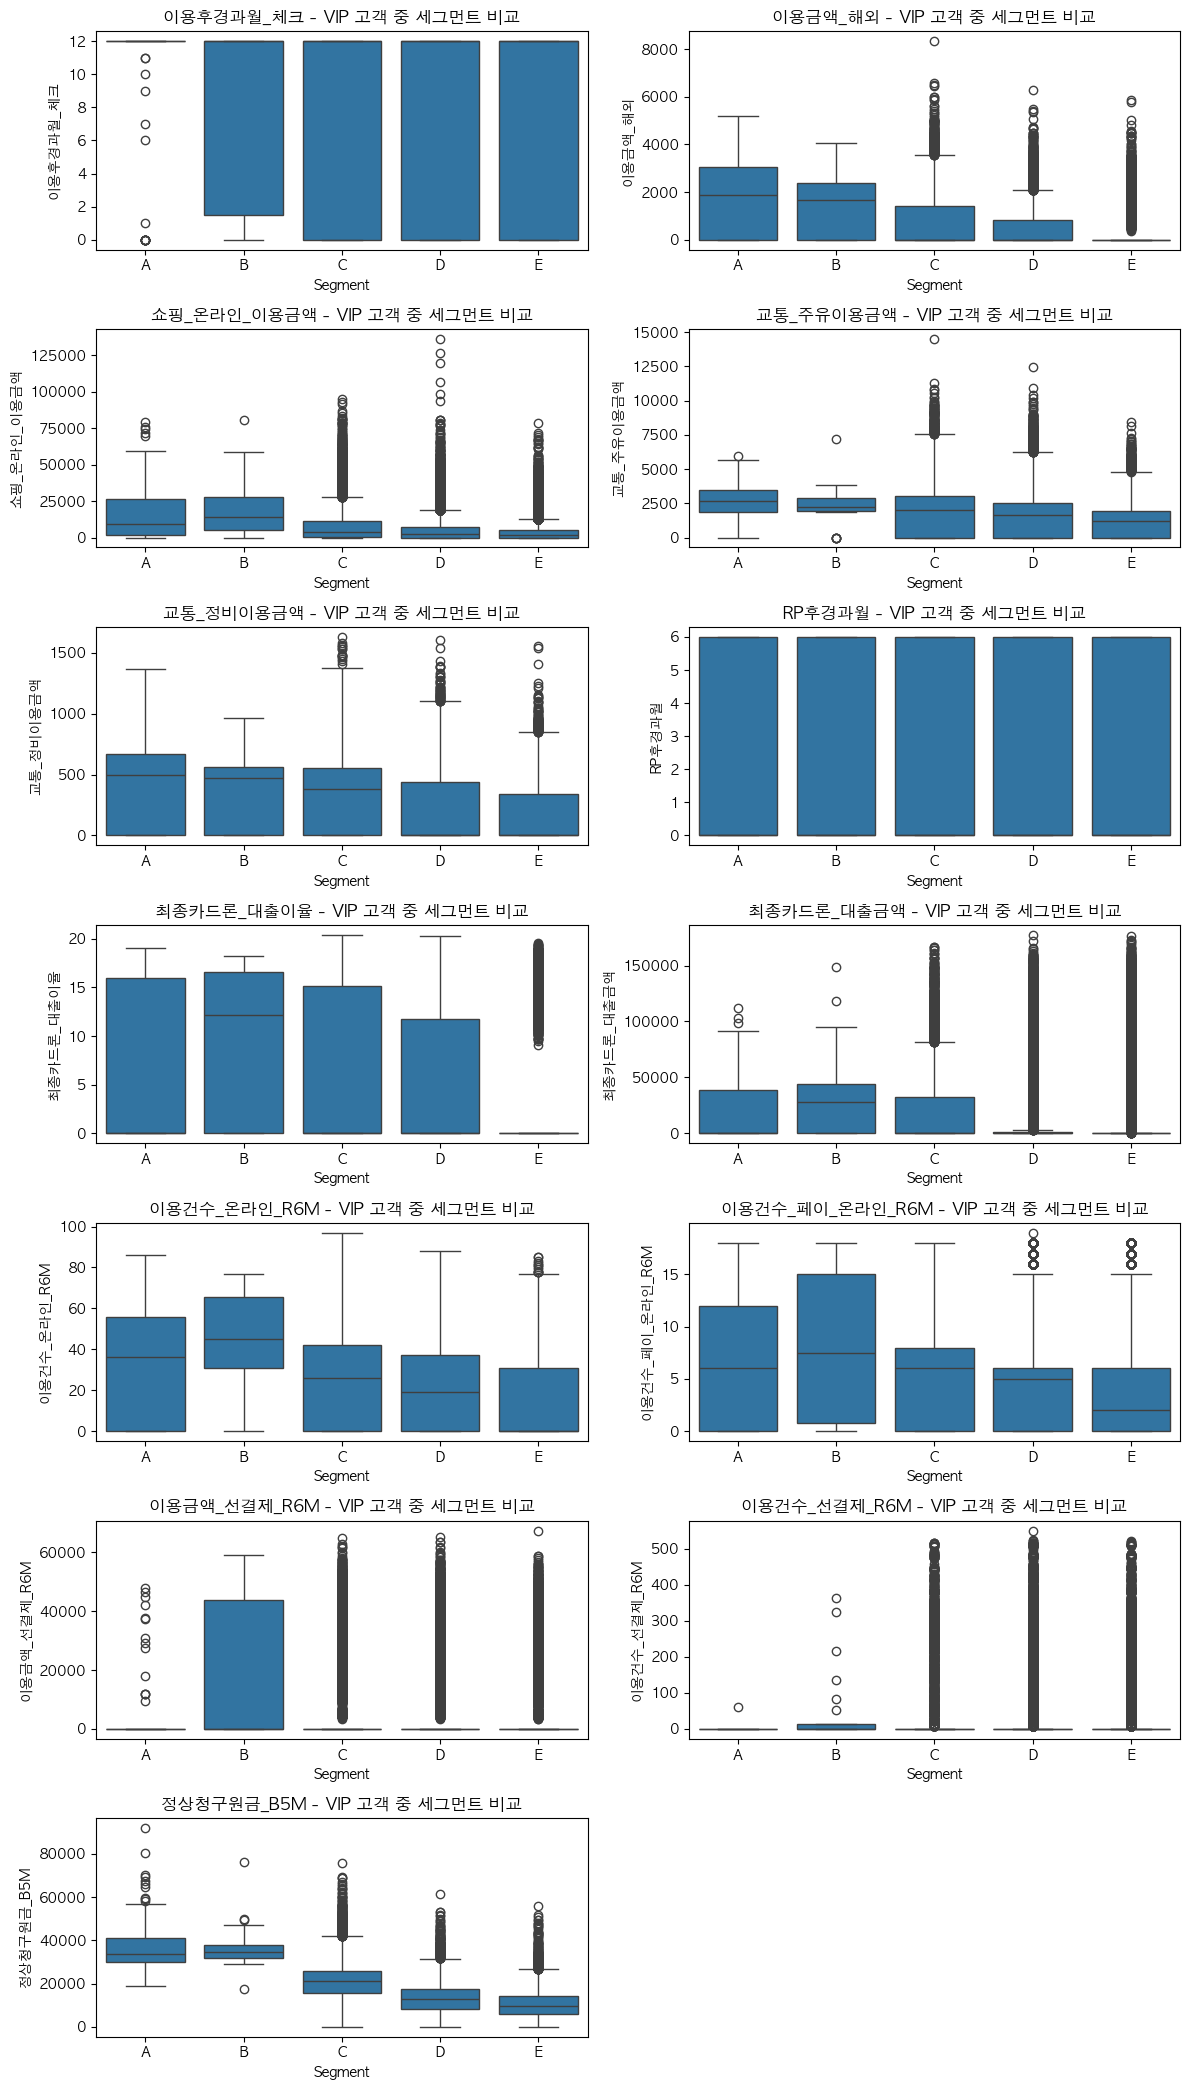

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_0_df['Segment'] = pd.Categorical(cluster_0_df['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

# subplot 그리기 설정
n_cols = 2
n_rows = (len(feature_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()  # 2차원 → 1차원 배열로 변환

# 변수별 박스플롯 그리기
for i, col in enumerate(feature_cols):
    sns.boxplot(data=cluster_0_df, x='Segment', y=col, ax=axes[i])
    axes[i].set_title(f"{col} - VIP 고객 중 세그먼트 비교")
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel(col)

# 안 쓰는 subplot 숨기기
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [150]:
# 불러오기
base_df = pd.read_parquet("../data/train/5.잔액정보/201812_train_잔액정보.parquet")

print(base_df.head())

     기준년월            ID  잔액_일시불_B0M  잔액_할부_B0M  잔액_현금서비스_B0M  잔액_리볼빙일시불이월_B0M  \
0  201812  TRAIN_000000         687        866         24017                0   
1  201812  TRAIN_000001        2264       1491             0                0   
2  201812  TRAIN_000002        7303       2370         21886             5380   
3  201812  TRAIN_000003        1479       2092         25353                0   
4  201812  TRAIN_000004           0          0             0                0   

   잔액_리볼빙CA이월_B0M  잔액_카드론_B0M  월중평잔_일시불_B0M  월중평잔_할부_B0M  ...  평잔_6M  \
0               0           0           850          503  ...  25755   
1               0           0          2222         1412  ...   6168   
2               0           0         10580         3315  ...  84397   
3               0           0           689         1833  ...  52311   
4               0           0             0            0  ...      0   

   평잔_일시불_6M  평잔_일시불_해외_6M  평잔_RV일시불_6M  평잔_RV일시불_해외_6M  평잔_할부_6M  \
0       233

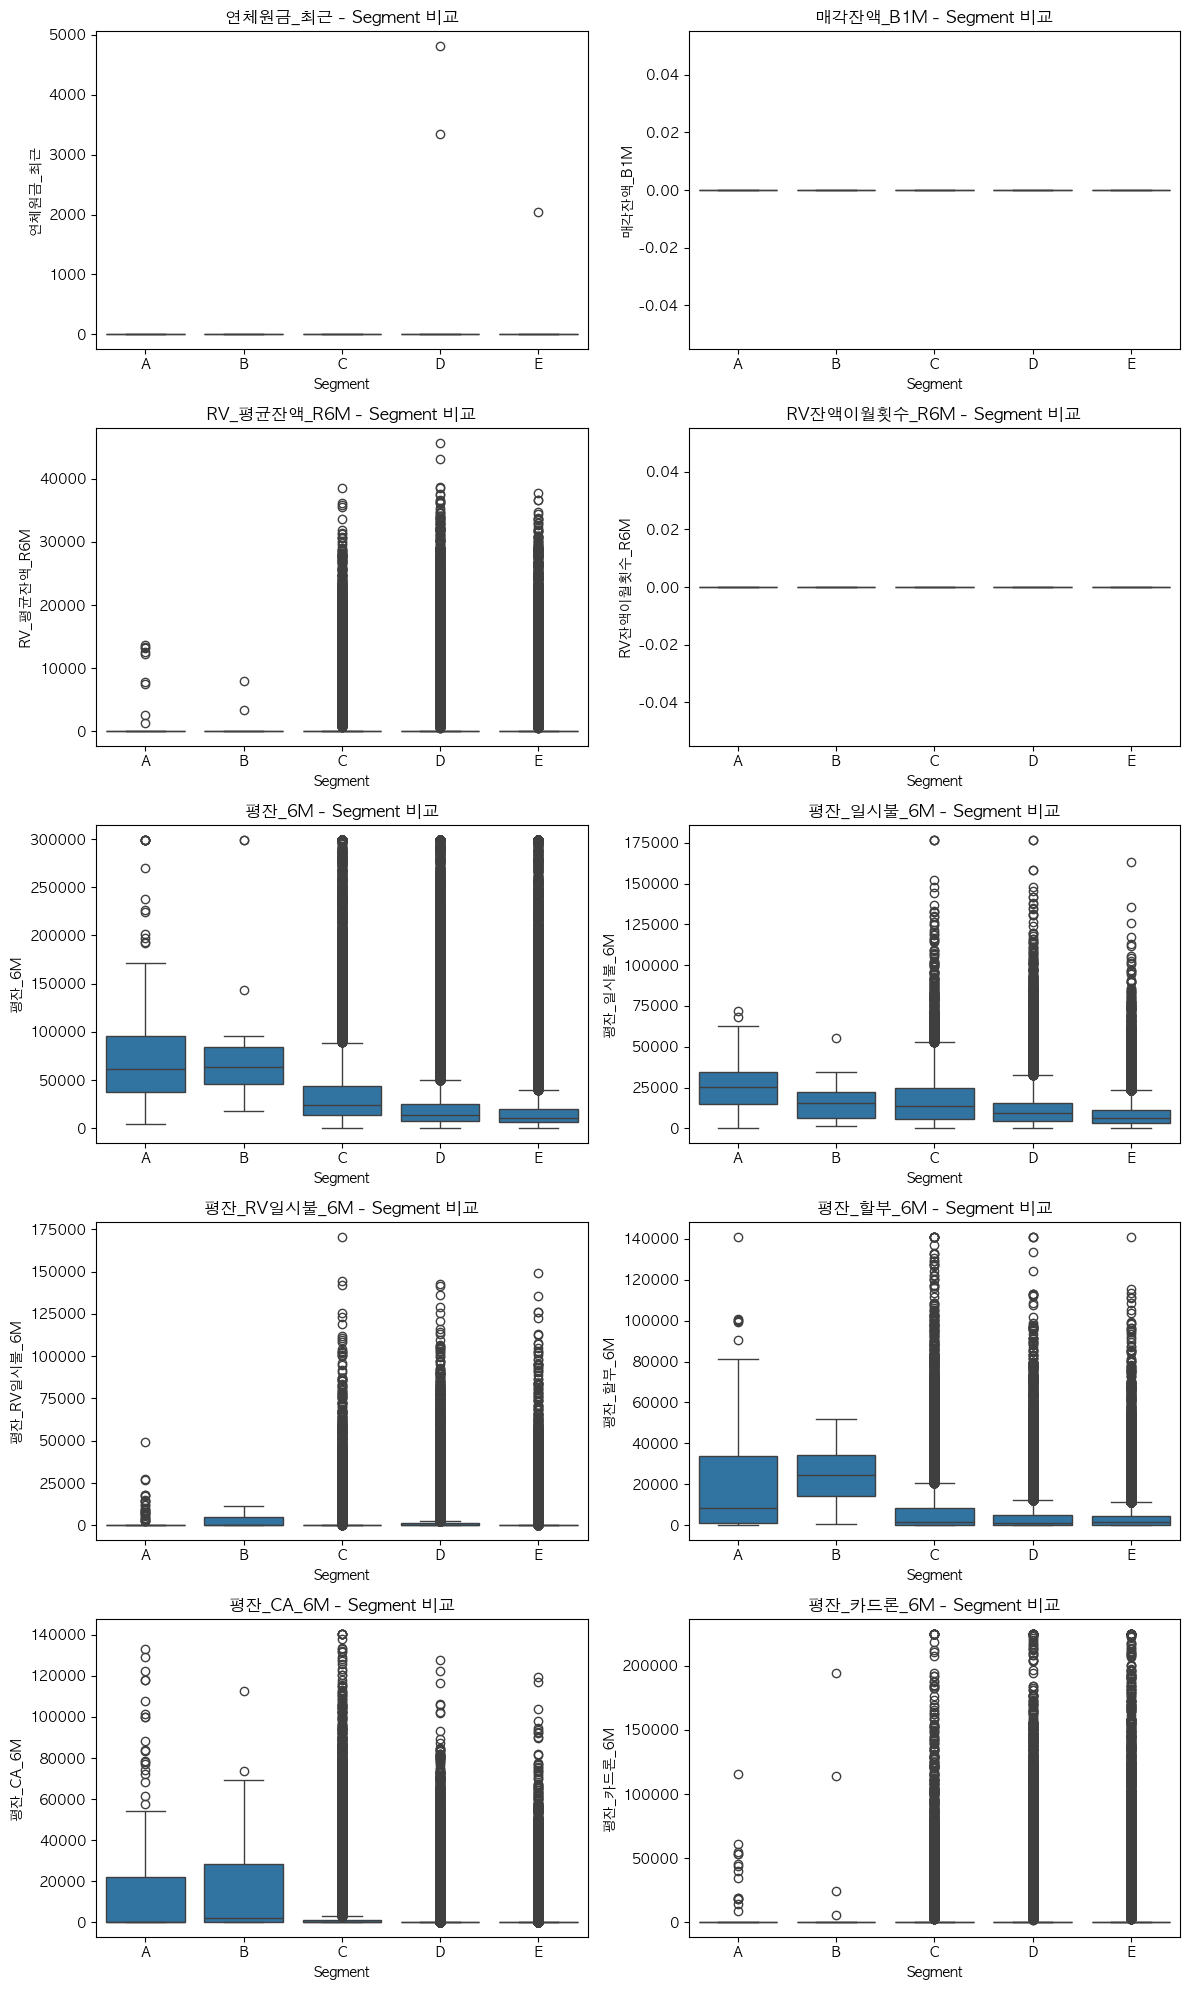

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. base_df에서 ID와 원하는 피처 추출
target_features = [
    'ID',  # 병합 키
    '연체원금_최근', '매각잔액_B1M', 'RV_평균잔액_R6M', 
    'RV잔액이월횟수_R6M', '평잔_6M', '평잔_일시불_6M',
    '평잔_RV일시불_6M', '평잔_할부_6M', '평잔_CA_6M', '평잔_카드론_6M'
]
base_selected = base_df[target_features]

# 2. cluster_0_df에서 ID와 Segment만 추출
cluster_segment = cluster_0_df[['ID', 'Segment']]

# 3. 병합 (inner join)
merged_df = pd.merge(cluster_segment, base_selected, on='ID', how='inner')

# 4. 박스플롯 시각화 (2열 구성)
feature_cols = target_features[1:]  # ID 제외
n_cols = 2
n_rows = (len(feature_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(data=merged_df, x='Segment', y=col, ax=axes[i])
    axes[i].set_title(f"{col} - Segment 비교")
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel(col)

# 안 쓰는 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [154]:
# 불러오기
base_df = pd.read_parquet("../data/train/1.회원정보/201812_train_회원정보.parquet")

print(base_df.head())

     기준년월            ID  남녀구분코드   연령 Segment  회원여부_이용가능  회원여부_이용가능_CA  \
0  201812  TRAIN_000000       2  40대       D          1             1   
1  201812  TRAIN_000001       1  30대       E          1             1   
2  201812  TRAIN_000002       1  30대       C          1             1   
3  201812  TRAIN_000003       2  40대       D          1             1   
4  201812  TRAIN_000004       2  40대       E          1             1   

   회원여부_이용가능_카드론  소지여부_신용  소지카드수_유효_신용  ...  할인금액_제휴연회비_B0M  청구금액_기본연회비_B0M  \
0              0        1            1  ...               0               0   
1              1        1            1  ...               0               0   
2              0        1            1  ...               0               0   
3              0        1            2  ...               0               0   
4              1        1            1  ...               0               0   

   청구금액_제휴연회비_B0M  상품관련면제카드수_B0M  임직원면제카드수_B0M  우수회원면제카드수_B0M  기타면제카드수_B0M  \
0       

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. base_df에서 ID와 원하는 피처 추출
target_features = [
    'ID',  # 병합 키
    '남녀구분코드', '회원여부_이용가능_카드론', '입회경과개월수_신용', 
    '회원여부_연체', '탈회횟수_발급1년이내', '탈회횟수_누적',
    '거주시도명', '유효카드수_신용', '이용카드수_신용', '이용금액_R3M_신용체크',
    '기본연회비_B0M', '제휴연회비_B0M'
]
base_selected = base_df[target_features]

# 2. cluster_0_df에서 ID와 Segment만 추출
cluster_segment = cluster_0_df[['ID', 'Segment']]

# 3. 병합 (inner join)
merged_df = pd.merge(cluster_segment, base_selected, on='ID', how='inner')

In [172]:
import numpy as np

# 1. 수도권 여부 컬럼 추가 (서울, 경기, 인천 → 수도권: 1, 그 외: 0)
merged_df['수도권여부'] = merged_df['거주시도명'].apply(lambda x: 1 if x in ['서울', '경기', '인천'] else 0)

# 2. 유효카드수 대비 이용카드수 비율 컬럼
merged_df['이용카드비율_신용'] = merged_df['이용카드수_신용'] / merged_df['유효카드수_신용']
# 0으로 나누는 경우 NaN이 발생할 수 있으므로 대체 처리
merged_df['이용카드비율_신용'] = merged_df['이용카드비율_신용'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 3. 기본연회비 대비 제휴연회비 비율 컬럼
merged_df['제휴연회비비율'] = merged_df['제휴연회비_B0M'] / merged_df['기본연회비_B0M']
merged_df['제휴연회비비율'] = merged_df['제휴연회비비율'].replace([np.inf, -np.inf], np.nan).fillna(0)

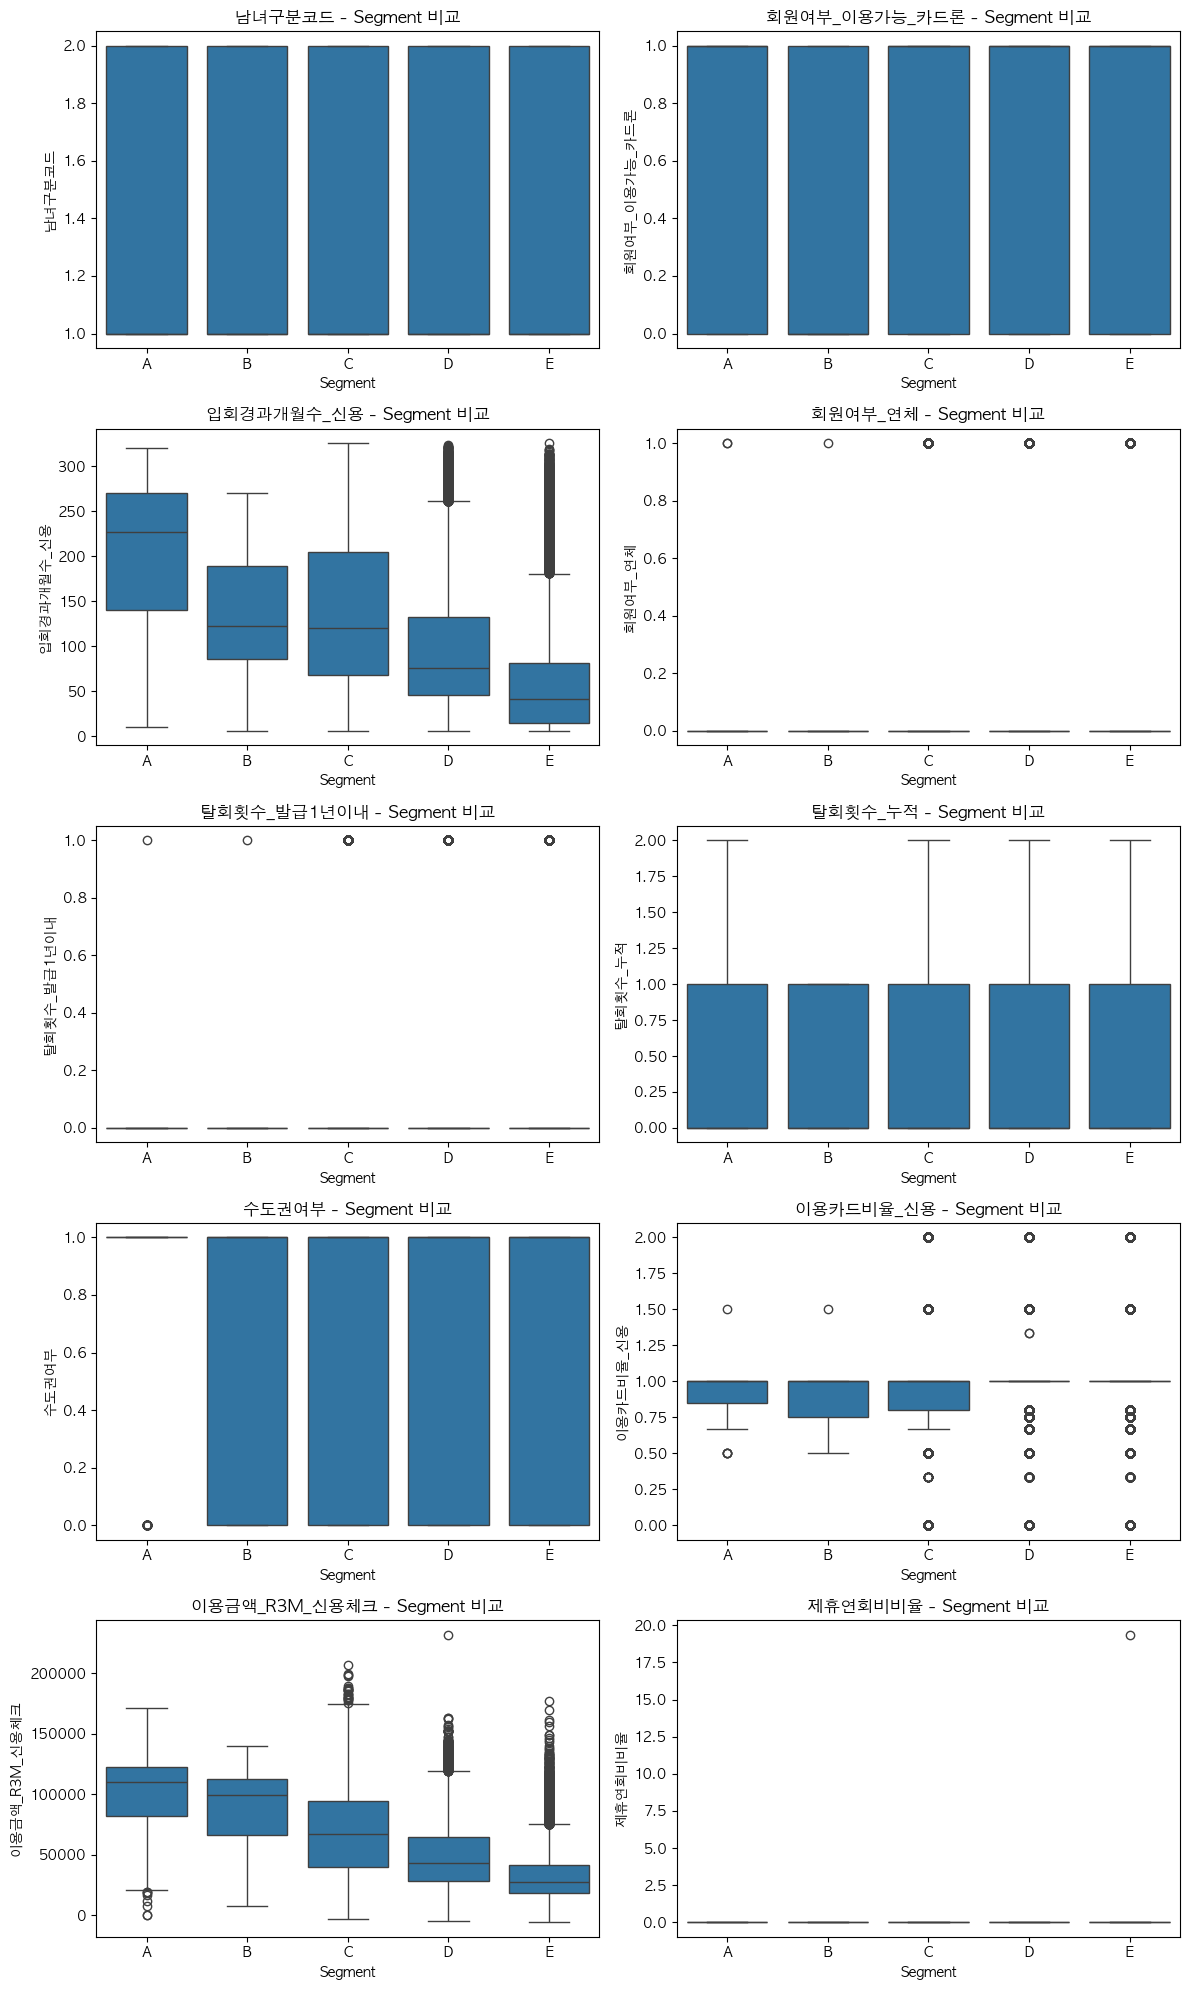

In [174]:
target_features = [
    'ID',  # 병합 키
    '남녀구분코드', '회원여부_이용가능_카드론', '입회경과개월수_신용', 
    '회원여부_연체', '탈회횟수_발급1년이내', '탈회횟수_누적',
    '수도권여부', '이용카드비율_신용', '이용금액_R3M_신용체크',
    '제휴연회비비율'
]

# 4. 박스플롯 시각화 (2열 구성)
feature_cols = target_features[1:]  # ID 제외
n_cols = 2
n_rows = (len(feature_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(data=merged_df, x='Segment', y=col, ax=axes[i])
    axes[i].set_title(f"{col} - Segment 비교")
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel(col)

# 안 쓰는 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()